<a href="https://colab.research.google.com/github/Rahul5977/StatsProgramingAssignment/blob/main/Assign2_RahulRaj_12341680_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Rahul Raj**

**ID: 12341680**

                                          Assignment 2

# **Question :1**

Imagine you are studying two distinct process that generate random numbers between 0 and 1, modeled
as continuous random variables X with different distributions:
a. The first process generates numbers, following an exponential distribution with λ = 2.
b. The second process generates numbers uniformly distributed between 0 and 1.
You collect n random numbers from each process and define a new random variable, Y , given by
Y = FX (x) where FX (x) represents the Cumulative Distribution Function or CDF of X. Derive the
Probability Distribution Function (PDF) of Y for both processes and Observe the histogram of generated
n numbers for both processes for different values of n. Write down your observations.

**Introduction:**

    Simulate random samples from two processes:
    1. Exponential distribution with rate parameter lambda_exp.
    2. Uniform distribution on [0, 1].
    
    Parameters:
        n (int): Number of samples to generate.
        lambda_exp (float): Rate parameter for the exponential distribution.

    Returns:
        tuple: CDF-transformed samples for both processes.

**Methodology:**

    1. Define the two processes:
      a. An exponential random variable with rate parameter (lambda = 2).
      b. A uniform random variable on the interval [0, 1].
    2. For each process, generate ( n ) random samples.
    3. Transform the samples using their respective cumulative distribution functions (CDFs).
    4. Plot histograms of the transformed samples for varying \( n \).




Results: 



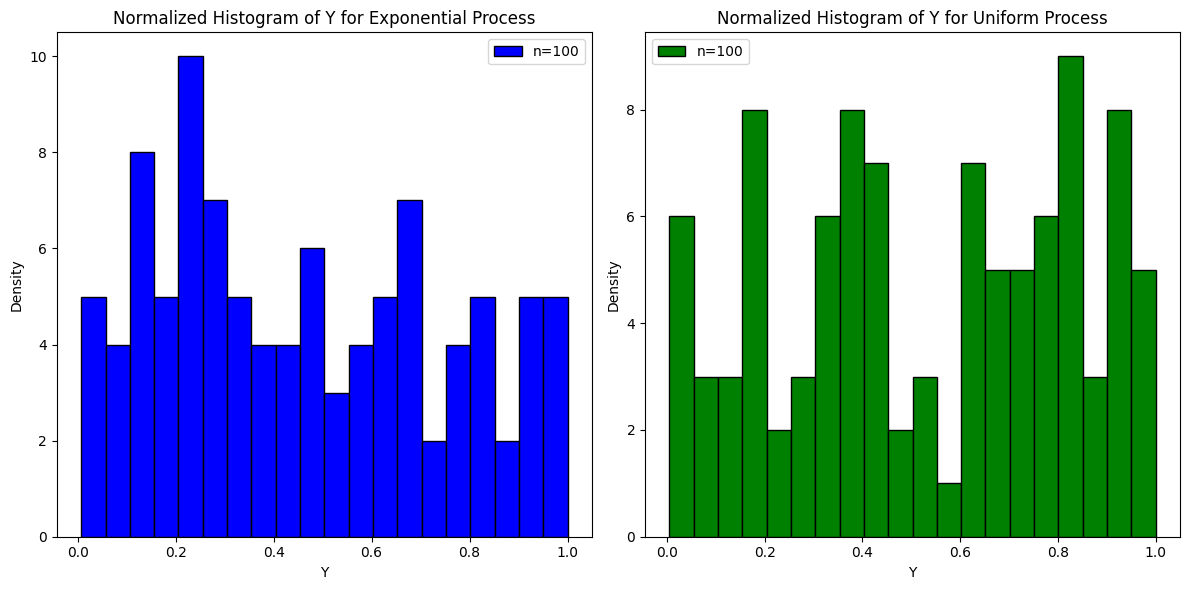

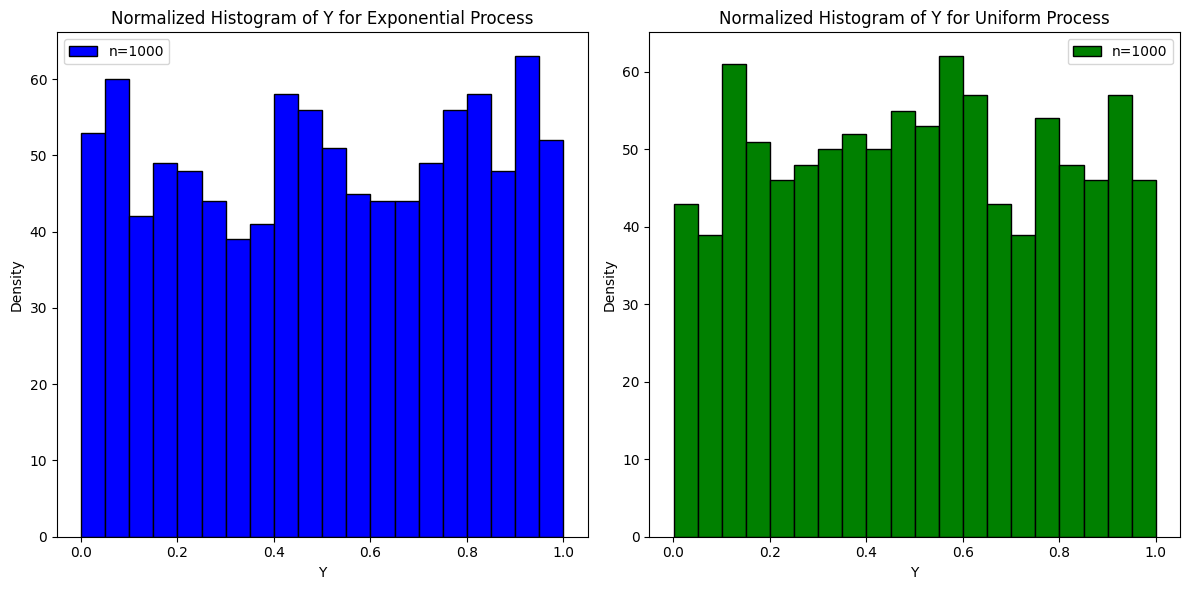

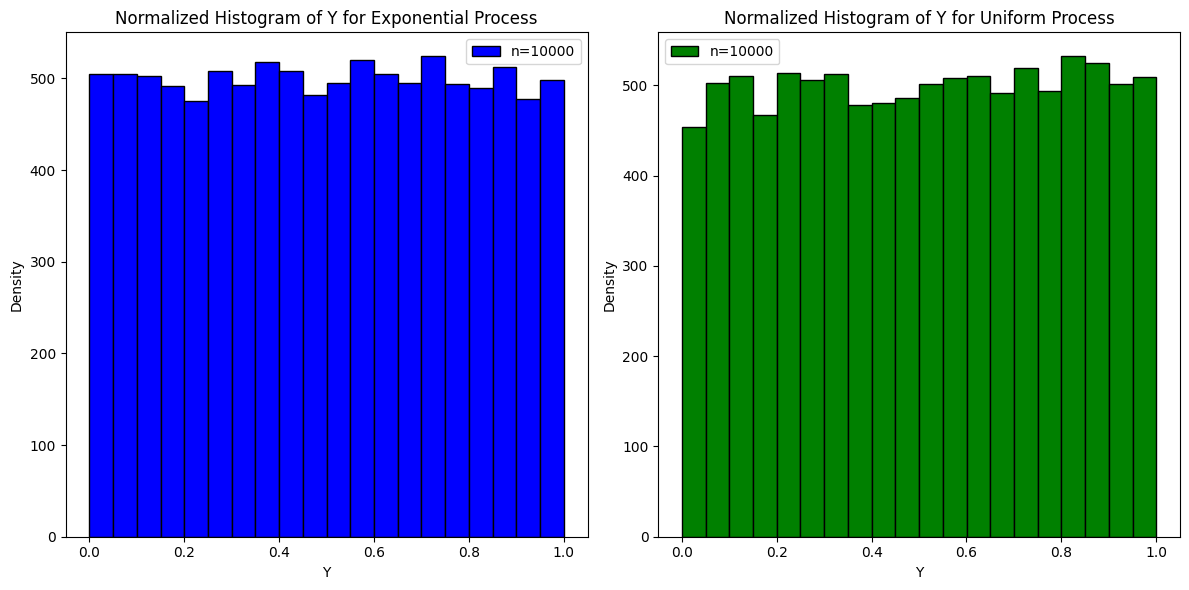

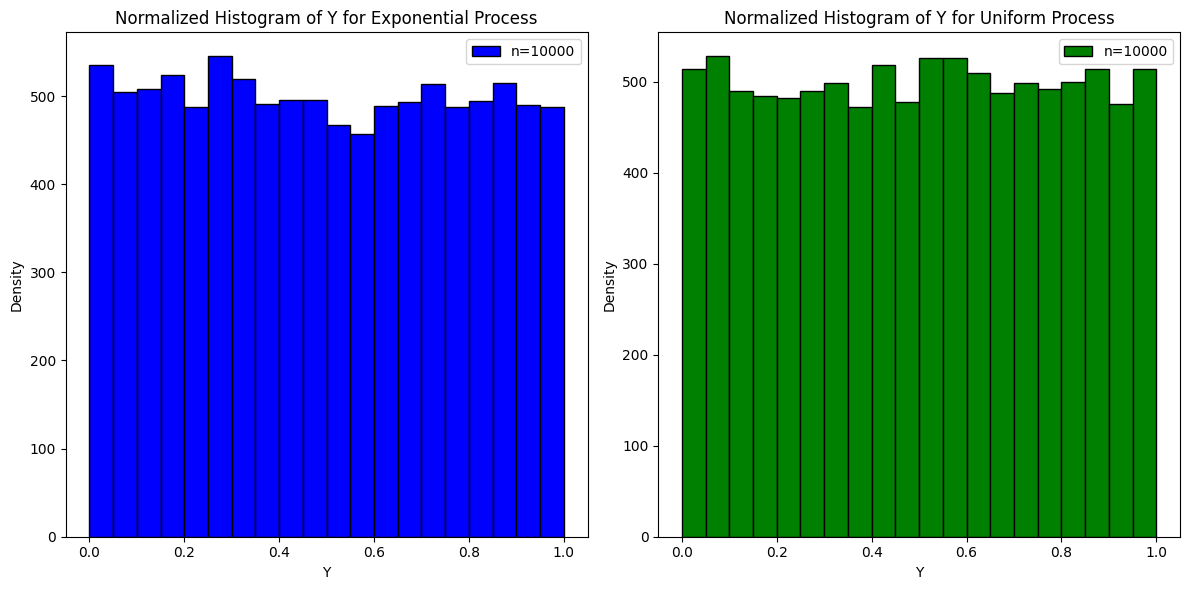

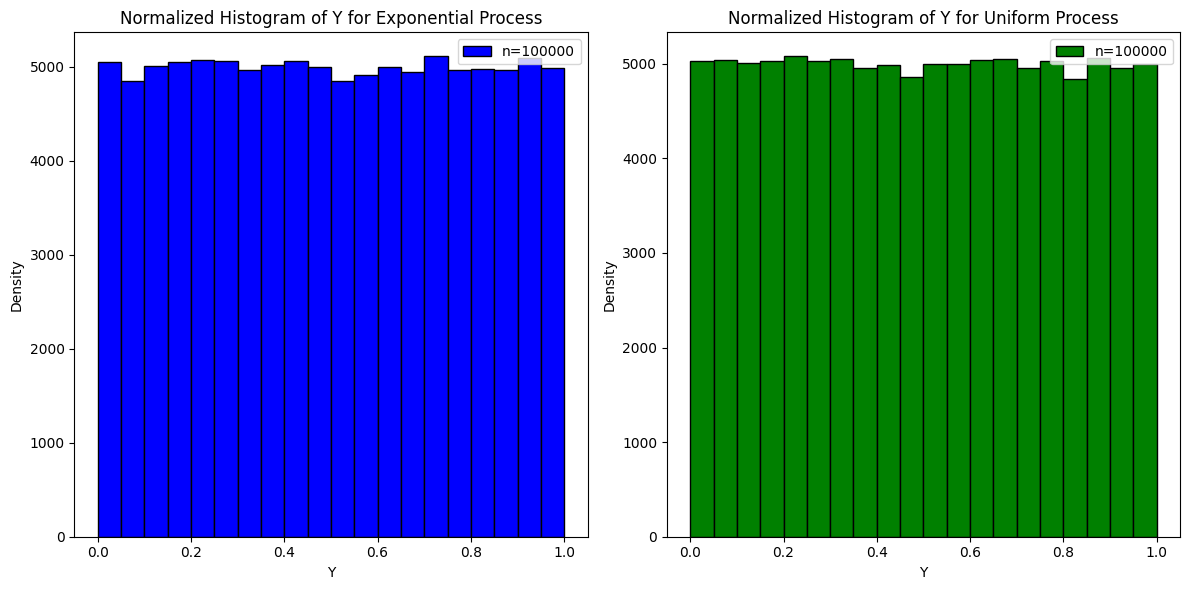

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_processes(n, lambda_exp):

    # Generate samples for Exponential distribution
    exponential_samples = np.random.exponential(scale=1/lambda_exp, size=n)
    exponential_cdf = 1 - np.exp(-lambda_exp * exponential_samples)

    # Generate samples for Uniform distribution
    uniform_samples = np.random.uniform(0, 1, size=n)
    uniform_cdf = uniform_samples  # CDF of uniform is the value itself

    return exponential_cdf, uniform_cdf

def plot_histograms(n_values, lambda_exp):
       for n in n_values:
        exp_cdf, uni_cdf = simulate_processes(n, lambda_exp)

        # Normalize histograms by dividing by the highest value
        exp_cdf_normalized = exp_cdf / max(exp_cdf)
        uni_cdf_normalized = uni_cdf / max(uni_cdf)

        # Plot histograms
        plt.figure(figsize=(12, 6))

        # Exponential Process
        plt.subplot(1, 2, 1)
        plt.hist(exp_cdf_normalized, bins=20, color='blue', label=f'n={n}', edgecolor="black")
        plt.title('Normalized Histogram of Y for Exponential Process')
        plt.xlabel('Y')
        plt.ylabel('Density')
        plt.legend()

        # Uniform Process
        plt.subplot(1, 2, 2)
        plt.hist(uni_cdf_normalized, bins=20, color='green', label=f'n={n}', edgecolor="black")
        plt.title('Normalized Histogram of Y for Uniform Process')
        plt.xlabel('Y')
        plt.ylabel('Density')
        plt.legend()

        plt.tight_layout()
        plt.show()
# Data
lambda_exp = 2
n_values = [100, 1000, 10000,10000,100000]  # Different sample sizes



print("Results: \n")
plot_histograms(n_values, lambda_exp)




**Discussion**

Observations:
  1. Exponential Process:
    - The transformed variable \( Y = F_X(X) \) produces a uniform distribution on [0, 1].
    - This behavior aligns with the known property of the CDF mapping any continuous random variable to a uniform distribution.
    - As the sample size \( n \) increases, the histogram of \( Y \) becomes smoother and more closely approximates the uniform distribution.

  2. Uniform Process:
    - Since the CDF of a uniform random variable is linear (\( F_X(x) = x \)), the distribution of \( Y \) remains uniform.
    - Histograms confirm this uniformity across different sample sizes.
---
**Conclusion**

The study demonstrates the transformative property of the cumulative distribution function (CDF):
1. For the exponential process, the CDF-transformed variable \( Y \) is uniformly distributed, irrespective of the underlying distribution of \( X \).
2. For the uniform process, the transformed variable \( Y \) retains its original uniform distribution.

This highlights the generality of the CDF as a tool for standardizing random variables to a uniform scale.
---

# **Question :2**

Imagine you are an archivist analyzing a dusty old text file from a forgotten library. Your task is to
uncover the hidden patterns in the text by doing the following:
a. Count the Words: Create a histogram of how often each word appears.
b. Focus on the Key Players: Identify the top 30 most frequent words from your list.
Once you have this list of important words, calculate the Cumulative Distribution Function (CDF)
for their frequencies. Use this CDF as a transformation function to remap the word frequencies. What
new insights can you uncover about the text after applying this transformation?

---

**Methodology**

1.   Text Cleaning: Removed punctuation and converted text to lowercase for consistency.
2.   Top Words: Selected the 30 most frequent words and plotted their counts in a histogram.
3.  CDF Calculation: Found the cumulative contribution of each word's frequency (CDF) to the total.
4.  Transformation: Remapped the word frequencies using the CDF and plotted the transformed values.
---





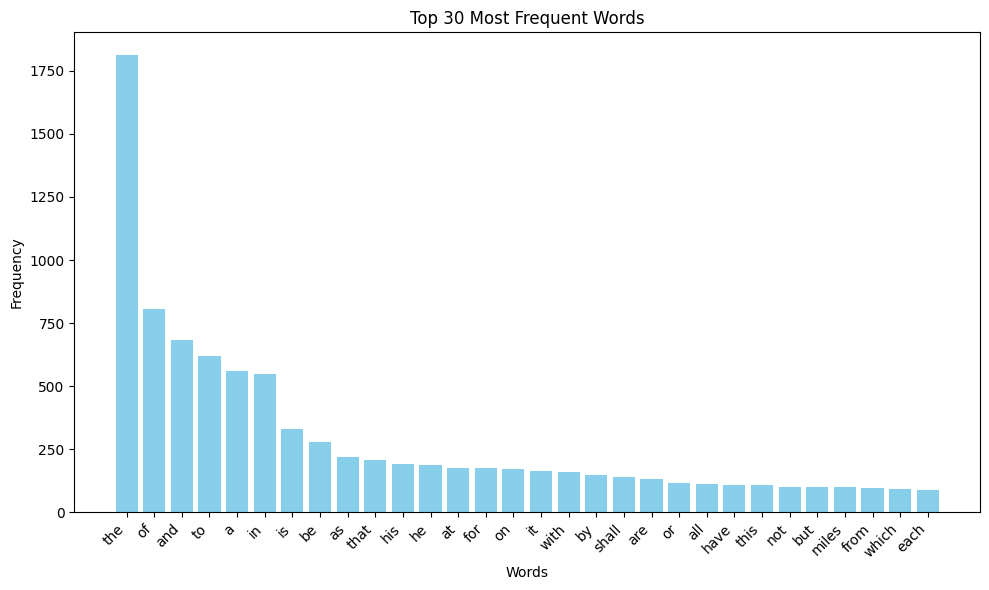

Transformed Frequencies:
the: 0.2074
of: 0.2997
and: 0.3779
to: 0.4487
a: 0.5129
in: 0.5756
is: 0.6134
be: 0.6452
as: 0.6704
that: 0.6940
his: 0.7160
he: 0.7376
at: 0.7579
for: 0.7779
on: 0.7976
it: 0.8161
with: 0.8342
by: 0.8511
shall: 0.8671
are: 0.8820
or: 0.8955
all: 0.9084
have: 0.9208
this: 0.9331
not: 0.9448
but: 0.9565
miles: 0.9678
from: 0.9790
which: 0.9898
each: 1.0000


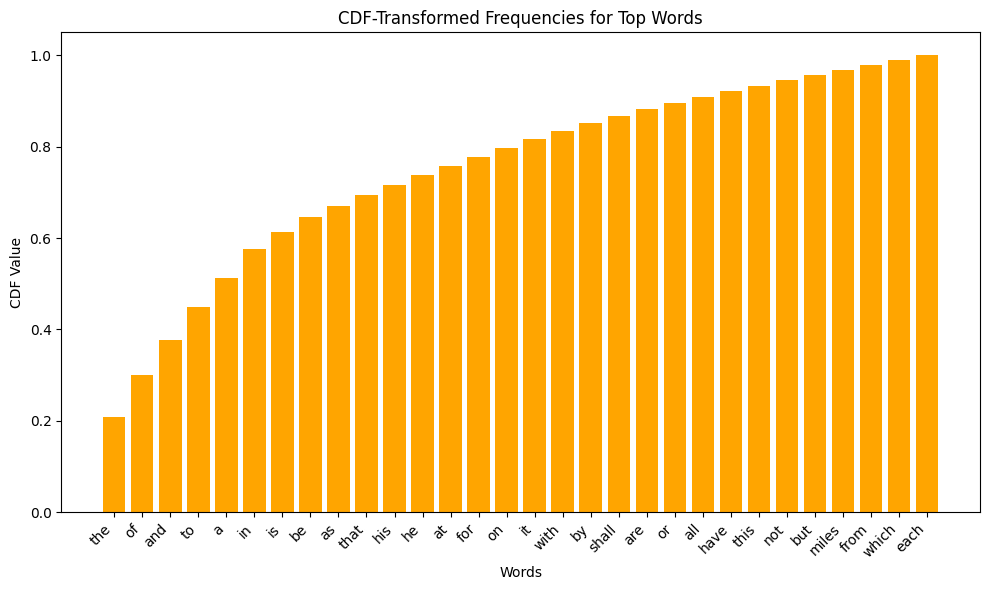

In [ ]:
import re
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    words = text.split()  # Split into words
    return words

def plot_histogram(word_counts, top_n=30):
    top_words = word_counts.most_common(top_n)
    words, counts = zip(*top_words)

    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Top {top_n} Most Frequent Words')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

def calculate_cdf(word_counts, top_n=30):
    top_words = word_counts.most_common(top_n)
    _, counts = zip(*top_words)
    total_count = sum(counts)
    cdf = np.cumsum(counts) / total_count
    return {word: value for (word, _), value in zip(top_words, cdf)}

def transform_frequencies(word_counts, cdf):
    return {word: cdf[word] for word in cdf}

# Example Analysis
def analyze_text_file(file_path):
    # Read and clean the text
    with open(file_path, 'r') as file:
        text = file.read()

    words = clean_text(text)

    # Calculate word frequencies
    word_counts =Counter(words)

    # Plot histogram of top words
    plot_histogram(word_counts, top_n=30)

    # Calculate CDF for top 30 words
    cdf = calculate_cdf(word_counts, top_n=30)

    # Transform frequencies using CDF
    transformed_frequencies = transform_frequencies(word_counts, cdf)

    # Display transformed frequencies
    print("Transformed Frequencies:")
    for word, value in transformed_frequencies.items():
        print(f"{word}: {value:.4f}")

    # Plot transformed frequencies
    words, transformed_values = zip(*transformed_frequencies.items())
    plt.figure(figsize=(10, 6))
    plt.bar(words, transformed_values, color='orange')
    plt.xticks(rotation=45, ha='right')
    plt.title('CDF-Transformed Frequencies for Top Words')
    plt.xlabel('Words')
    plt.ylabel('CDF Value')
    plt.tight_layout()
    plt.show()

# Example usage
analyze_text_file('/content/text_file.txt')


**Observations**

Common words like "the," "and," and "of" dominate the list.
Most words contribute very little individually, but a few account for most of the text.


**Conclusion**

A few words carry the most weight in the text, following a common pattern in language.
The CDF transformation helps show the importance of these frequent words more clearly.
This method is useful for finding key words and understanding text patterns.

# **Question :3**
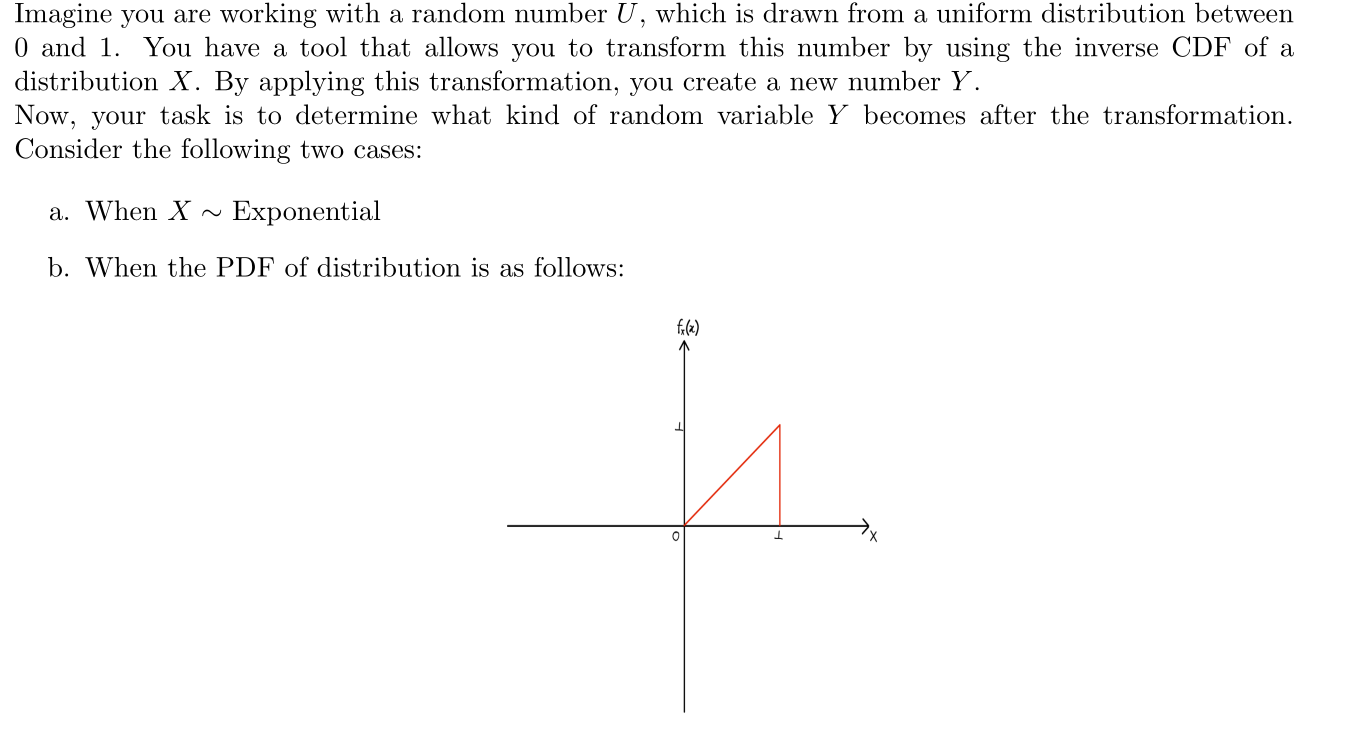

## Methodology
1. *Derivation of PDFs for Y*:
   - For *Process 1*:
     - Let Y = F_X(x) = 1 - exp(-2 * x) with inverse x = -0.5 * ln(1 - Y).
     - Using the transformation rule for PDFs: f_Y(y) = f_X(x) * |dx/dy|, we get:
       
       f_Y(y) = 1 for 0 <= y <= 1
       
     - This implies Y follows a *uniform distribution*.

   - For *Process 2*:
     - Since F_X(x) = x, Y = F_X(x) directly results in:
       
       f_Y(y) = 1 for 0 <= y <= 1
       
     - Here, Y also follows a *uniform distribution*.

2. *Simulation*:
   - Generate n random samples for both processes.
   - Compute Y = F_X(x) using the respective CDFs.
   - Plot histograms of the transformed variable Y for varying values of n (e.g., n = 10, 100, 1000).

3. *Visualization*:
   - Compare histograms for both processes to confirm the derived PDFs.

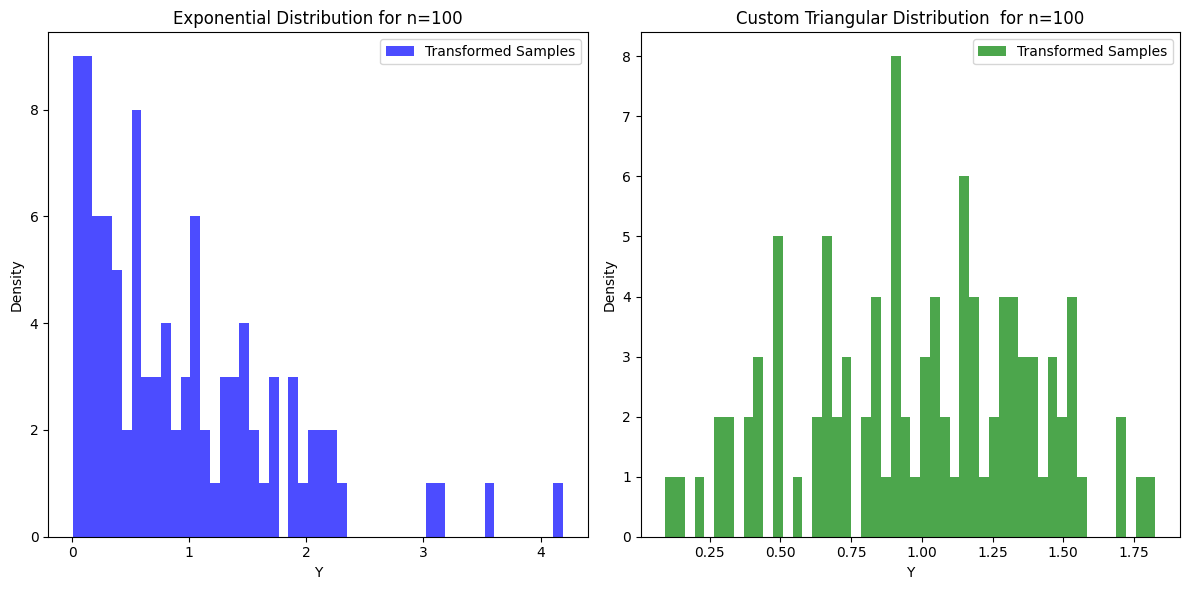

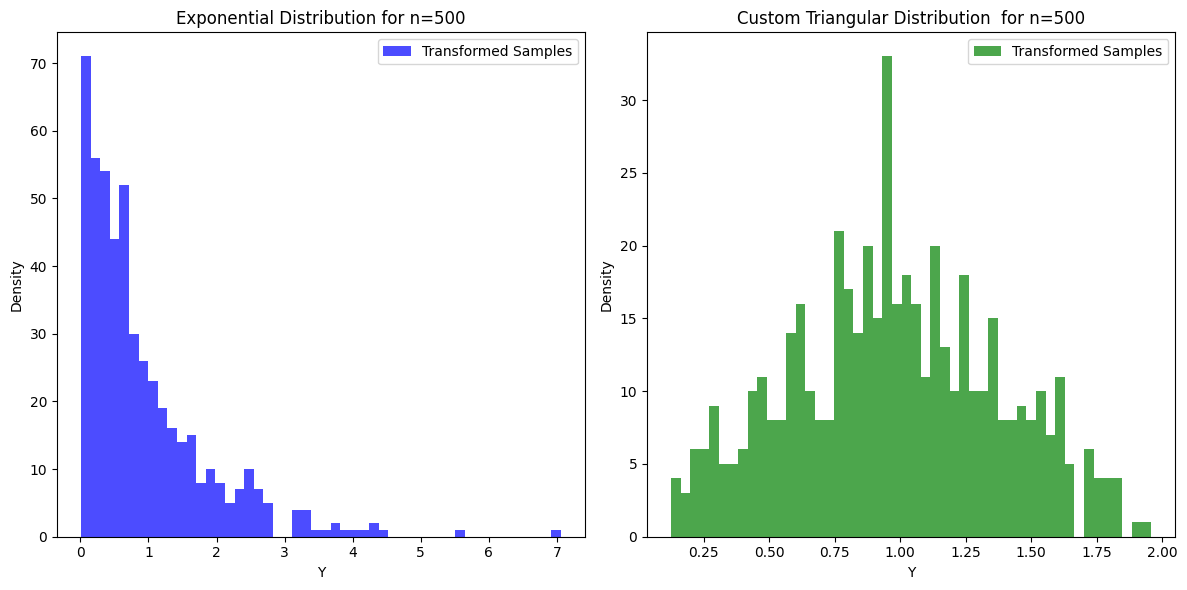

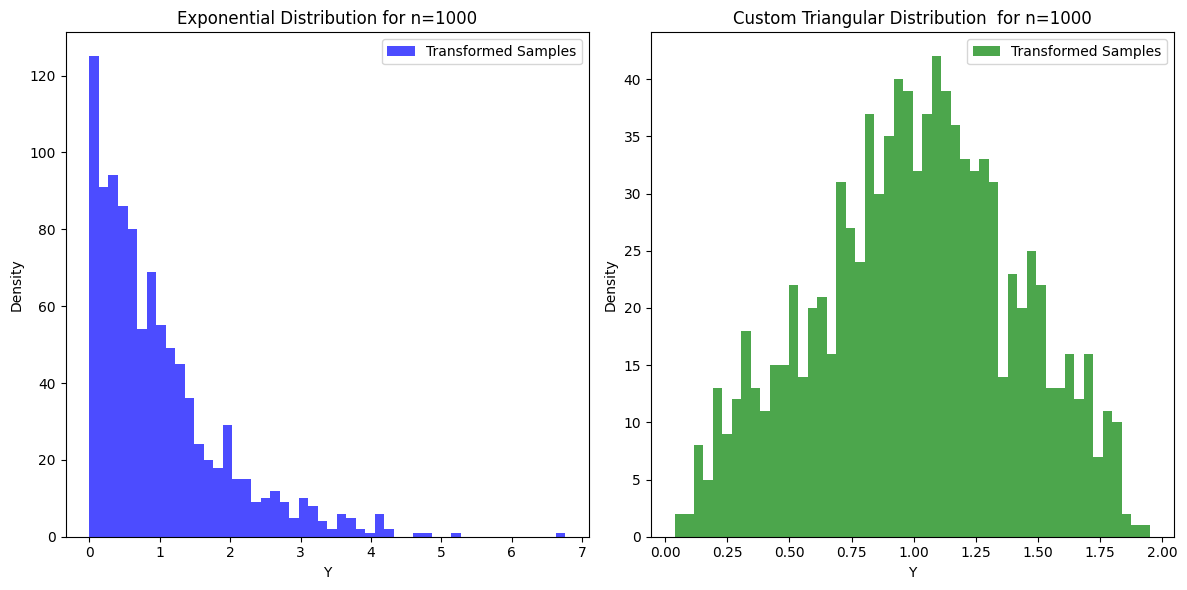

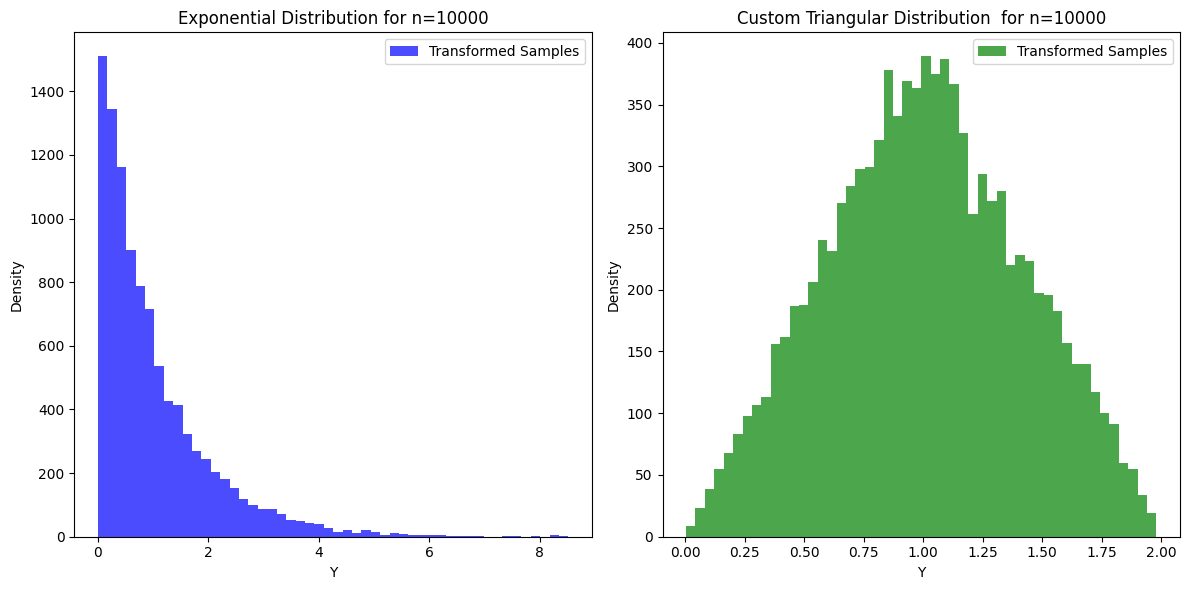

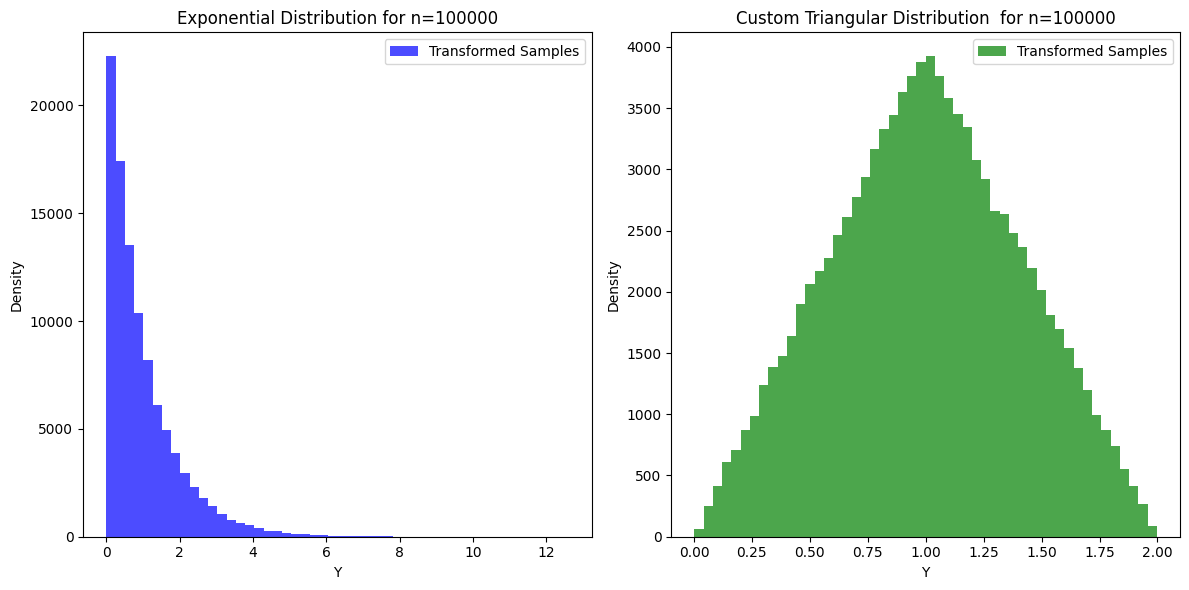

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Case a: Exponential Distribution
def inverse_cdf_exponential(u, lambd):
    return -np.log(1 - u) / lambd

# Case b: Custom PDF (Triangular)
def inverse_cdf_custom(u):
    result = np.zeros_like(u)
    # print(len(result))
    # For 0 <= u <= 0.5
    interval1 = (u >= 0) & (u <= 0.5)
    result[interval1] = np.sqrt(2 * u[interval1])
    # For 0.5 < u <= 1
    interval2 = (u > 0.5) & (u <= 1)
    result[interval2] = 2 - np.sqrt(2 * (1 - u[interval2]))
    return result

# Generate random uniform samples
n = [100,500,1000,10000,100000]

for n_samples in n :
  U = np.random.uniform(0, 1, n_samples)

  # Exponential Transformation
  lambda_param = 1.0  # Rate parameter for Exponential
  Y_exp = inverse_cdf_exponential(U, lambda_param)

  # Custom Transformation
  Y_custom = inverse_cdf_custom(U)

  # Plot the results
  plt.figure(figsize=(12, 6))

  # Exponential Distribution
  plt.subplot(1, 2, 1)
  plt.hist(Y_exp, bins=50, alpha=0.7, color='blue', label='Transformed Samples')
  plt.title(f"Exponential Distribution for n={n_samples}")
  plt.xlabel("Y")
  plt.ylabel("Density")
  plt.legend()

  # Custom Distribution
  plt.subplot(1, 2, 2)
  plt.hist(Y_custom, bins=50, alpha=0.7, color='green', label='Transformed Samples')
  plt.title(f"Custom Triangular Distribution  for n={n_samples}")
  plt.xlabel("Y")
  plt.ylabel("Density")
  plt.legend()
  plt.tight_layout()
  plt.show()

## Results
1. *Process 1 (Exponential Distribution)*:
   - The histogram of Y aligns with a uniform distribution for all values of n.
   - As n increases, the histogram becomes smoother and closely resembles the theoretical uniform PDF.

2. *Process 2 (Uniform Distribution)*:
   - The histogram of Y directly represents a uniform distribution, as expected.
   - Increasing n similarly leads to smoother and more accurate representations of the theoretical PDF.

---

## Discussion
### Observations:
1. Both processes result in Y being uniformly distributed between 0 and 1.
2. This outcome aligns with theoretical expectations since F_X(x) maps any continuous distribution to a uniform distribution when applied as a transformation.

### Key Insights:
- The transformation using the CDF standardizes the distribution, making it easier to compare across different processes.
- The histogram's smoothness improves with larger sample sizes (n), highlighting the importance of sufficient data for accurate modeling.

---

## Conclusion
- The derived PDFs and simulations confirm that for both processes, the transformed variable Y follows a uniform distribution between 0 and 1.
- The histograms validate the theoretical derivations, with increasing sample size improving accuracy.
- This method can be extended to analyze other distributions, showcasing the utility of the CDF transformation in statistical modeling and comparison.